In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
KDD_10_dataset_path = '/content/gdrive/MyDrive/Pattern_Anomaly_Detection/KDD_10Precent'
whole_KDD_dataset_path='/content/gdrive/MyDrive/Pattern_Anomaly_Detection/KDD_whole/kddcup.data.gz'
corrected_dataset_path='/content/gdrive/MyDrive/Pattern_Anomaly_Detection/corrected'
zipped_corrected_path='/content/gdrive/MyDrive/Pattern_Anomaly_Detection/corrected_data_zipped/corrected.gz'
zipped_kdd_10_path='/content/gdrive/MyDrive/Pattern_Anomaly_Detection/KDD_10_zipped/kddcup.data_10_percent.gz'

In [ ]:
names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]


In [ ]:
def convert_categorical_to_numerical(data_frame):
    # loop over all columns in the DataFrame
    for colum in data_frame.columns:
      # check if column contains categorical data
        if data_frame[colum].dtype == 'object':
            data_frame[colum] = pd.factorize(data_frame[colum])[0]  # convert categorical data to numerical data

    return data_frame

In [ ]:
for foldername in os.listdir(KDD_10_dataset_path):

    f = os.path.join(KDD_10_dataset_path, foldername)
    Kdd_corrected = pd.read_csv(f,names=names)
for foldername in os.listdir(corrected_dataset_path):
    f = os.path.join(corrected_dataset_path, foldername)
    Kdd_corrected=Kdd_corrected.append(pd.read_csv(f,names=names),ignore_index = True)
Kdd_corrected=convert_categorical_to_numerical(Kdd_corrected)



<ipython-input-6-deccb91f7afe>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Kdd_corrected=Kdd_corrected.append(pd.read_csv(f,names=names),ignore_index = True)


In [ ]:
training_set=Kdd_corrected.iloc[:494021,:]
testing_set=Kdd_corrected.iloc[494022:,:]



In [ ]:
for foldername in os.listdir(corrected_dataset_path):

    f = os.path.join(corrected_dataset_path, foldername)
    training_data=training_data.append(pd.read_csv(f,names=names),ignore_index = True)

**Read whole Data set**

In [ ]:
import gzip
from sklearn import preprocessing


with gzip.open(whole_KDD_dataset_path,'rb') as f:
      whole_kdd=pd.read_csv(f,header=None)


le=preprocessing.LabelEncoder()
string_cols=whole_kdd.select_dtypes(include=['object']).columns.tolist()
for x in string_cols:
  whole_kdd[x]=le.fit_transform(whole_kdd[x])

whole_kdd_train=whole_kdd.iloc[:,:-1]
whole_kdd_train_label=whole_kdd.iloc[:,-1]

# **K-means**


In [ ]:
from scipy.spatial.distance import cdist
import warnings
def K_Means(X_train,k, Iterations):
  #choosing random centroid indices from the entered data
  index = np.random.choice(len(X_train), k, replace=False)
  centroids = X_train[index, :]
  print(X_train.shape)
  print(X_train[2,:])
  print("type : ",type(X_train[2][4]))
  print("centroid :",centroids[2,:])
  #finding distances between centroids and each point in X_train
  distances = cdist(X_train, centroids ,'euclidean')

  #choose the smallest distances
  points = np.array([np.argmin(i) for i in distances])

  #repeating the previous after updating centroid in each iteration
  for _ in range(Iterations):
        centroids = []
        for idx in range(k):
            if (np.sum(points==idx)>0):

            #Updating Centroids by taking mean of Cluster it belongs to
              temp_cent = X_train[points==idx].mean(axis=0)
            else:
              temp_cent=np.zeros(X_train.shape[1]);

            centroids.append(temp_cent)
        #if np.allclose(centroids[-2],temp_cent):
         # break;
        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(X_train, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

  return points,centroids

(494021, 41)
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.350e+02 1.337e+03 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 8.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 2.900e+01 2.900e+01 1.000e+00 0.000e+00
 3.000e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
type :  <class 'numpy.float64'>
centroid : [  0.   2.   9.   0. 520.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 511. 511.   0.   0.   0.   0.
   1.   0.   0. 255. 255.   1.   0.   1.   0.   0.   0.   0.   0.]
labels are : [6 6 6 ... 6 6 6]
centroid:::::::::: [[2.00000000e+00 0.00000000e+00 2.00000000e+00 6.00000000e+00
  6.93375640e+08 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.0

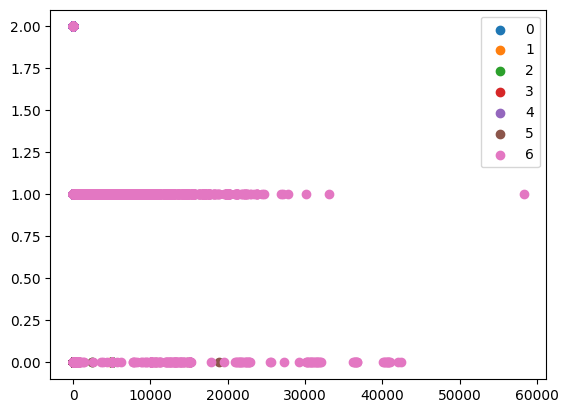

In [ ]:
# Applying K means at K=7 with max iter. 400
label,Centroids = K_Means(np.nan_to_num(training_set.values[:,:-1]),7,400)
centroid_7=Centroids
#Visualize
print("labels are :",label)
print("centroid::::::::::",Centroids)
u_labels = np.unique(label)
print("np unique ",u_labels)
#print clusters
for i in u_labels:
  print("cluster {} includes :{}\n".format(i,label==i))
for i in u_labels:
    plt.scatter(training_set.values[label == i , 0] , training_set.values[label == i , 1] , label = i)
plt.legend()
plt.show()

type of f  <class 'pandas.core.frame.DataFrame'>
   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2               

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


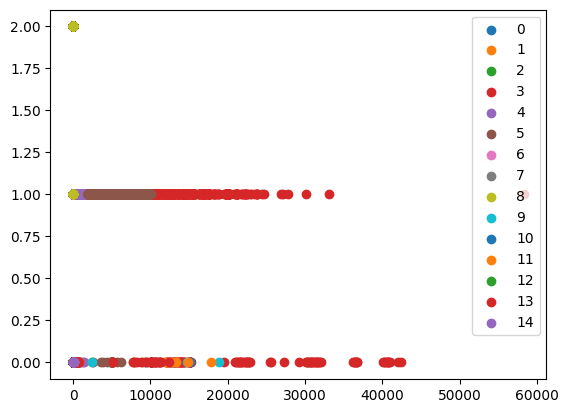

(494021, 41)
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.350e+02 1.337e+03 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 8.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 2.900e+01 2.900e+01 1.000e+00 0.000e+00
 3.000e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
type :  <class 'numpy.float64'>
centroid : [0.00e+00 0.00e+00 1.10e+01 4.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.48e+02 1.90e+01
 1.00e+00 1.00e+00 0.00e+00 0.00e+00 1.30e-01 5.00e-02 0.00e+00 2.55e+02
 1.90e+01 7.00e-02 6.00e-02 0.00e+00 0.00e+00 1.00e+00 1.00e+00 0.00e+00
 0.00e+00]
[12 13 13 ... 13 13 13]
cluster 0 includes :2271 

cluster 1 includes :82 

cluster 2 includes :739 

cluster 3 includes :42 

cluster 4 includes :106 

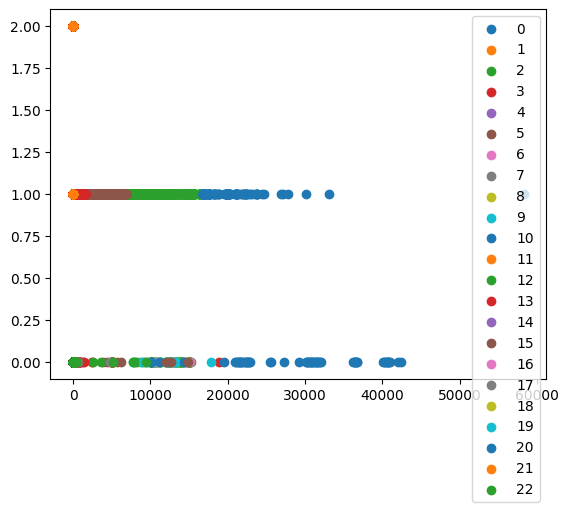

(494021, 41)
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.350e+02 1.337e+03 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 8.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 2.900e+01 2.900e+01 1.000e+00 0.000e+00
 3.000e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
type :  <class 'numpy.float64'>
centroid : [0.000e+00 2.000e+00 9.000e+00 0.000e+00 1.032e+03 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 5.110e+02 5.110e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 2.550e+02 2.550e+02 1.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
[20 28 12 ... 12 12 12]
cluster 0 includes :105 

cluster 1 includes :35 

cluster 2 includes :227854 

cluste

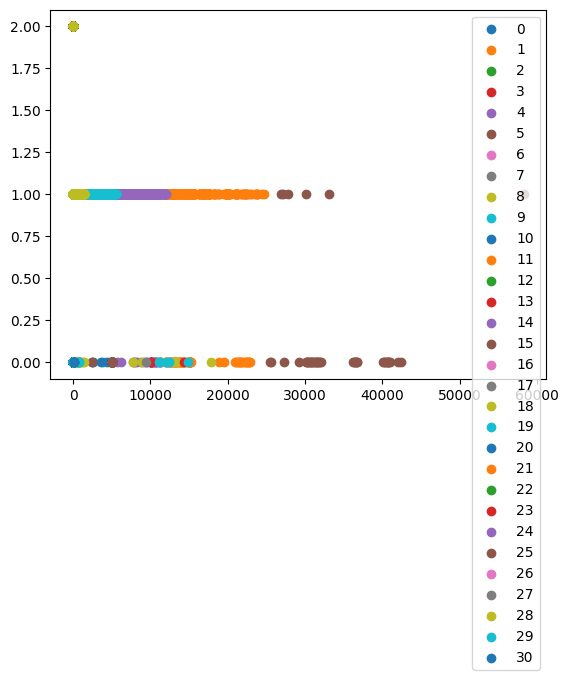

(494021, 41)
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.350e+02 1.337e+03 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 8.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 2.900e+01 2.900e+01 1.000e+00 0.000e+00
 3.000e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
type :  <class 'numpy.float64'>
centroid : [0.00e+00 0.00e+00 1.10e+01 2.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00
 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.14e+02 1.50e+01
 0.00e+00 0.00e+00 1.00e+00 1.00e+00 1.30e-01 6.00e-02 0.00e+00 2.55e+02
 1.30e+01 5.00e-02 7.00e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00 1.00e+00
 1.00e+00]
[ 8 29 18 ... 18 18 18]
cluster 0 includes :105 

cluster 1 includes :227844 

cluster 2 includes :641 

cluster 3 includes :12 

cluster 4 includes :3

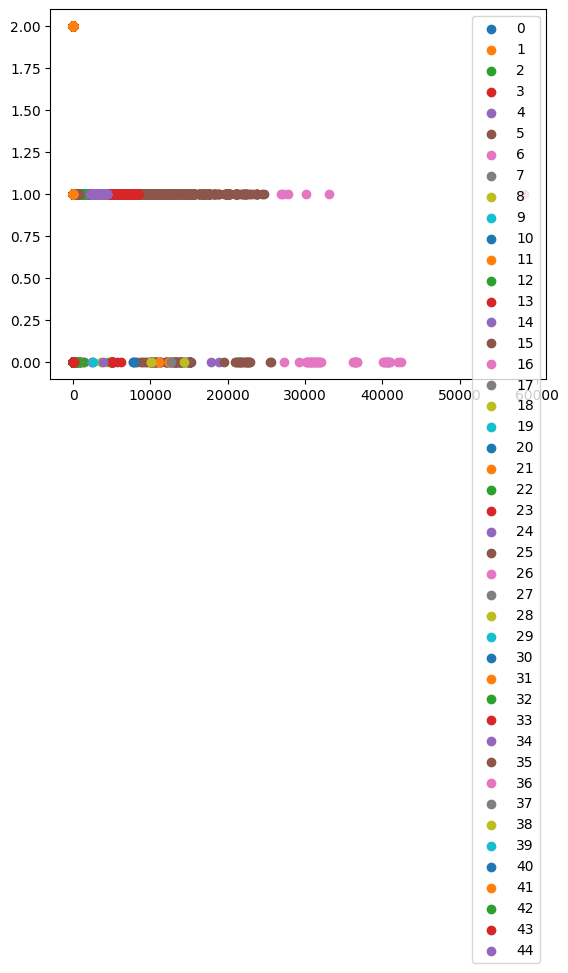

In [ ]:
K=[15,23,31,45]
centroid_15=[]
centroid_23=[]
centroid_31=[]
centroid_45=[]
for foldername in os.listdir(KDD_10_dataset_path):

    f = os.path.join(KDD_10_dataset_path, foldername)
    training_data = pd.read_csv(f,names=names)
print("type of f ",type(training_data))
print(training_data.head())
training_data=convert_categorical_to_numerical(training_data)

print("after encoding:" ,convert_categorical_to_numerical(training_data).head())
for instance_k in K:

  label,cen = K_Means(training_set.values[:,:-1],instance_k,300)
  if(instance_k==15):
    centroid_15=cen;
  elif(instance_k==23):
    centroid_23=cen;
  elif(instance_k==31):
    centroid_31=cen
  else:
    centroid_45=cen
#Visualize
  print(label)
  u_labels = np.unique(label)
#print clusters
  for i in u_labels:
    print("cluster {} includes :{} \n".format(i,np.sum(label==i)))
  for i in u_labels:
      plt.scatter(training_set.values[label == i , 0] , training_set.values[label == i , 1] , label = i)
  plt.legend()
  plt.show()

In [ ]:
#Evaluation
#for k=7
#calculate distance between each centroid and points in test data
distances_test_set = cdist(testing_set.values[:,:-1], centroid_7 ,'euclidean')

  #choose the smallest distances
labels_test_data = np.array([np.argmin(i) for i in distances_test_set])
print(labels_test_data.shape,testing_set.iloc[:,-1].shape )
print(np.unique(labels_test_data))
print(np.unique(testing_set.iloc[:,-1]))
print(np.unique(training_set.iloc[:,-1]))
print("type of clusters label :",type(labels_test_data))
print("type of ground truth :",type(np.array(testing_set.iloc[:,-1])))
evaluation(labels_test_data,np.array(testing_set.iloc[:,-1]),7)

(311028,) (311028,)
[1 2 3 4 5 6]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
type of clusters label : <class 'numpy.ndarray'>
type of ground truth : <class 'numpy.ndarray'>
number of clusters in ground truth labels >> 40
....................Evaluation for cluster : 1.........................
total size of the cluster is : 1
number of majority samples in the cluster >>  1.0
number of samples in all clusters >> 60592.0
cluster precision >> 1.0
cluster recall >> 1.6503828888302086e-05
cluster f1 value >> 3.3007113032858576e-05
cluster conditional entropy H(T|C1)>> 0.0
.......................................

....................Evaluation for cluster : 2.........................
total size of the cluster is : 6
number of majority samples in the cluster >>  4.0
number of samples in all clusters >> 60592.0
cluster precision >> 0.6666666666666666
cl

In [ ]:
#Evaluation
#for k=15
#calculate distance between each centroid and points in test data
distances_test_set = cdist(testing_set.values[:,:-1], centroid_15 ,'euclidean')

  #choose the smallest distances
labels_test_data = np.array([np.argmin(i) for i in distances_test_set])
print(labels_test_data.shape,testing_set.iloc[:,-1].shape )
print(np.unique(labels_test_data))
print(np.unique(testing_set.iloc[:,-1]))
print(np.unique(training_set.iloc[:,-1]))
print("type of clusters label :",type(labels_test_data))
print("type of ground truth :",type(np.array(testing_set.iloc[:,-1])))
evaluation(labels_test_data,np.array(testing_set.iloc[:,-1]),15)

(311028,) (311028,)
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
type of clusters label : <class 'numpy.ndarray'>
type of ground truth : <class 'numpy.ndarray'>
number of clusters in ground truth labels >> 40
....................Evaluation for cluster : 0.........................
total size of the cluster is : 1
number of majority samples in the cluster >>  1.0
number of samples in all clusters >> 60592.0
cluster precision >> 1.0
cluster recall >> 1.6503828888302086e-05
cluster f0 value >> 3.3007113032858576e-05
cluster conditional entropy H(T|C0)>> 0.0
.......................................

....................Evaluation for cluster : 1.........................
total size of the cluster is : 6
number of majority samples in the cluster >>  4.0
number of samples in all clusters >> 60592.0
cluster prec

In [ ]:
#Evaluation
#for k=23
#calculate distance between each centroid and points in test data
distances_test_set = cdist(testing_set.values[:,:-1], centroid_23 ,'euclidean')

  #choose the smallest distances
labels_test_data = np.array([np.argmin(i) for i in distances_test_set])
print(labels_test_data.shape,testing_set.iloc[:,-1].shape )
print(np.unique(labels_test_data))
print(np.unique(testing_set.iloc[:,-1]))
print(np.unique(training_set.iloc[:,-1]))
print("type of clusters label :",type(labels_test_data))
print("type of ground truth :",type(np.array(testing_set.iloc[:,-1])))
evaluation(labels_test_data,np.array(testing_set.iloc[:,-1]),23)

(311028,) (311028,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
type of clusters label : <class 'numpy.ndarray'>
type of ground truth : <class 'numpy.ndarray'>
number of clusters in ground truth labels >> 40
....................Evaluation for cluster : 0.........................
total size of the cluster is : 2105
number of majority samples in the cluster >>  1064.0
number of samples in all clusters >> 1098.0
cluster precision >> 0.5054631828978622
cluster recall >> 0.9690346083788707
cluster f0 value >> 0.6643771464252263
cluster conditional entropy H(T|C0)>> 1.6201898091934255
.......................................

....................Evaluation for cluster : 1.........................
total size of the cluster is : 6
number of majority samples in the cluster >>  4.0
number

In [ ]:
#Evaluation
#for k=31
#calculate distance between each centroid and points in test data
distances_test_set = cdist(testing_set.values[:,:-1], centroid_31 ,'euclidean')

  #choose the smallest distances
labels_test_data = np.array([np.argmin(i) for i in distances_test_set])
print(labels_test_data.shape,testing_set.iloc[:,-1].shape )
print(np.unique(labels_test_data))
print(np.unique(testing_set.iloc[:,-1]))
print(np.unique(training_set.iloc[:,-1]))
print("type of clusters label :",type(labels_test_data))
print("type of ground truth :",type(np.array(testing_set.iloc[:,-1])))
evaluation(labels_test_data,np.array(testing_set.iloc[:,-1]),31)

(311028,) (311028,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
type of clusters label : <class 'numpy.ndarray'>
type of ground truth : <class 'numpy.ndarray'>
number of clusters in ground truth labels >> 40
....................Evaluation for cluster : 0.........................
total size of the cluster is : 113
number of majority samples in the cluster >>  69.0
number of samples in all clusters >> 60592.0
cluster precision >> 0.6106194690265486
cluster recall >> 0.001138764193292844
cluster f0 value >> 0.0022732888559426736
cluster conditional entropy H(T|C0)>> 1.2802945264724188
.......................................

....................Evaluation for cluster : 1.........................
total size of the cluster is : 20
number of majority samples 

In [ ]:
#Evaluation
#for k=45
#calculate distance between each centroid and points in test data
distances_test_set = cdist(testing_set.values[:,:-1], centroid_45 ,'euclidean')

  #choose the smallest distances
labels_test_data = np.array([np.argmin(i) for i in distances_test_set])
print(labels_test_data.shape,testing_set.iloc[:,-1].shape )
print(np.unique(labels_test_data))
print(np.unique(testing_set.iloc[:,-1]))
print(np.unique(training_set.iloc[:,-1]))
print("type of clusters label :",type(labels_test_data))
print("type of ground truth :",type(np.array(testing_set.iloc[:,-1])))
evaluation(labels_test_data,np.array(testing_set.iloc[:,-1]),45)

(311028,) (311028,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
type of clusters label : <class 'numpy.ndarray'>
type of ground truth : <class 'numpy.ndarray'>
number of clusters in ground truth labels >> 40
....................Evaluation for cluster : 0.........................
total size of the cluster is : 113
number of majority samples in the cluster >>  69.0
number of samples in all clusters >> 60592.0
cluster precision >> 0.6106194690265486
cluster recall >> 0.001138764193292844
cluster f0 value >> 0.0022732888559426736
cluster conditional entropy H(T|C0)>> 1.2802945264724188
.......................................

....................Evaluation for cluster : 1.........................
total size of the c

(494021, 41)
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.350e+02 1.337e+03 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 8.000e+00 8.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 2.900e+01 2.900e+01 1.000e+00 0.000e+00
 3.000e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
type :  <class 'numpy.float64'>
centroid : [0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.030e+02 7.158e+03 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 2.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 1.000e+00 0.000e+00 0.000e+00 2.550e+02 2.550e+02 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
labels are : [7 7 7 ... 7 7 7]
centroid:::::::::: [[1.28126155e+04 8.68884540e-01 1.04657534e+01 6.82974560e-0

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


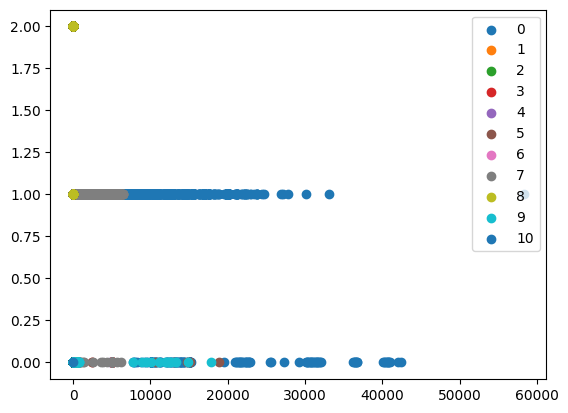

In [ ]:
# Applying K means at K=11 with max iter. 400
label,Centroids = K_Means(np.nan_to_num(training_set.values[:,:-1]),11,400)
centroid_11=Centroids
#Visualize
print("labels are :",label)
print("centroid::::::::::",Centroids)
u_labels = np.unique(label)
print("np unique ",u_labels)

  #print clusters
for i in u_labels:
  print("cluster {} includes :{} \n".format(i,np.sum(label==i)))
for i in u_labels:
    plt.scatter(training_set.values[label == i , 0] , training_set.values[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
evaluation(label,np.array(training_set.iloc[:,-1]),11)

number of clusters in ground truth labels >> 23
....................Evaluation for cluster : 0.........................
total size of the cluster is : 105
number of majority samples in the cluster >>  85.0
number of samples in all clusters >> 97278.0
cluster precision >> 0.8095238095238095
cluster recall >> 0.0008737844116860955
cluster f0 value >> 0.0017456845650678252
cluster conditional entropy H(T|C0)>> 0.7024665512903903
.......................................

....................Evaluation for cluster : 1.........................
total size of the cluster is : 227844
number of majority samples in the cluster >>  227844.0
number of samples in all clusters >> 280790.0
cluster precision >> 1.0
cluster recall >> 0.811439153816019
cluster f1 value >> 0.895905503761054
cluster conditional entropy H(T|C1)>> 0.0
.......................................

....................Evaluation for cluster : 2.........................
total size of the cluster is : 641
number of majority samples in

# **Agglomerative Clustering**

In [ ]:
from sklearn.model_selection import train_test_split

training_normalized_data, testing_normalized_data,training_normalized_labels, testing_normalized_labels= train_test_split(whole_kdd_train, whole_kdd_train_label, train_size=0.0015, random_state=42,stratify=whole_kdd_train_label)

In [ ]:
import numpy as np
import math
class AgglomerativeClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
    def merge(self,j,i):
      if (len(self.labels_indicies[j])>1):
               for indexofclusters in self.labels_indicies[j]:

                 self.labels_[indexofclusters]=self.labels_[(self.labels_indicies[i])[0]]

                 self.labels_indicies[i].append(indexofclusters)

      else:
        self.labels_[(self.labels_indicies[j])[0]]=self.labels_[(self.labels_indicies[i])[0]]
        x=(self.labels_indicies[j])[0]
        #print(type(x))
        self.labels_indicies[i].append(x)



    def fit(self, X):
        n_samples = X.shape[0]
        self.labels_ = np.arange(n_samples)
        self.labels_indicies=[]
        for x in range (n_samples):
          self.labels_indicies.append([x])


        n_clusters = n_samples


        distance_matrix = self._single_linkage(X)

        clusterscounter=0
        previous_clustercounter=0
        while n_clusters > self.n_clusters:

            i, j = np.unravel_index(np.argmin(distance_matrix), distance_matrix.shape)


            if(j>i):
              self.merge(j,i)
              self.labels_indicies = np.delete(self.labels_indicies, j)

            # Merge the closest pair of clusters
            elif(i>j):
              self.merge(i,j)
              self.labels_indicies = np.delete(self.labels_indicies, i)

            n_clusters -= 1

            # Update the distance matrix

            for k in range(n_samples):

                if(i==k):
                  distance_matrix[i, j]=math.inf
                else:

                  distance_matrix[i, k] = min(distance_matrix[i, k], distance_matrix[j, k])
                  distance_matrix[k, i] = distance_matrix[i, k]




            distance_matrix = np.delete(distance_matrix, j, axis=0)
            distance_matrix = np.delete(distance_matrix, j, axis=1)
            n_samples=n_samples-1

        self.labels_ = self.labels_.astype(np.int)
        self.labels_=self.modify_labels(self.labels_indicies,self.labels_)
        return self
    def modify_labels(self,labels_indicies,labels_):
      cluster_counter=0
      for cluster in labels_indicies:
        for index in cluster:
          labels_[index]=cluster_counter
        cluster_counter=cluster_counter+1
      return labels_



    def _single_linkage(self, X):
        n_samples = X.shape[0]
        distance_matrix = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range( n_samples):
                if(i==j):
                  distance_matrix[i, j]=math.inf
                else:
                  distance_matrix[i, j] = np.sqrt(np.sum((X[i] - X[j])**2))
                  distance_matrix[j, i] = distance_matrix[i, j]


        return distance_matrix


In [ ]:
training_data=training_normalized_data.to_numpy()

In [ ]:
aglomerative=AgglomerativeClustering(11)
aglomerative.fit(training_data)

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)
<ipython-input-7-68b23bae5634>:71: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.labels_ = self.labels_.astype(np.int)


In [ ]:
unique, counts = np.unique(aglomerative.labels_, return_counts=True)

dict(zip(unique, counts))

{0: 7330, 1: 4, 2: 1, 3: 2, 4: 1, 5: 3, 6: 1, 7: 1, 8: 1, 9: 1, 10: 2}

In [ ]:
print(type(aglomerative.labels_))

<class 'numpy.ndarray'>


In [ ]:
evaluation(aglomerative.labels_, training_normalized_labels.to_numpy(), 11)

number of clusters in ground truth labels >> 22
....................Evaluation for cluster : 0.........................
total size of the cluster is : 7330
number of majority samples in the cluster >>  4211.0
number of samples in all clusters >> 4211.0
cluster precision >> 0.5744884038199182
cluster recall >> 1.0
cluster f0 value >> 0.7297461225197124
cluster conditional entropy H(T|C0)>> 1.4776686771458951
.......................................

....................Evaluation for cluster : 1.........................
total size of the cluster is : 4
number of majority samples in the cluster >>  4.0
number of samples in all clusters >> 1459.0
cluster precision >> 1.0
cluster recall >> 0.0027416038382453737
cluster f1 value >> 0.005468215994531784
cluster conditional entropy H(T|C1)>> 0.0
.......................................

....................Evaluation for cluster : 2.........................
total size of the cluster is : 1
number of majority samples in the cluster >>  1.0
numbe

# **Normalized Cut**

In [ ]:
from sklearn.model_selection import train_test_split

training_normalized_data, testing_normalized_data,training_normalized_labels, testing_normalized_labels= train_test_split(whole_kdd_train, whole_kdd_train_label, train_size=0.0015, random_state=42,stratify=whole_kdd_train_label)
print(training_normalized_data.shape)
print(training_normalized_data)
print(training_normalized_labels.shape)
print(training_normalized_labels)
print(testing_normalized_data.shape)
print(testing_normalized_labels.shape)

(7347, 41)
         0   1   2   3     4     5   6   7   8   9   ...   31   32    33  \
1399261   0   1  24   1     0     0   0   0   0   0  ...    1   28  1.00   
649857    0   1  49   5     0     0   0   0   0   0  ...  255    5  0.02   
4822974   0   1  24   9   279   296   0   0   0   0  ...  255  255  1.00   
861609    0   1  24   9   305   502   0   0   0   0  ...   15  255  1.00   
1760842   0   0  15   9  1032     0   0   0   0   0  ...  255  255  1.00   
...      ..  ..  ..  ..   ...   ...  ..  ..  ..  ..  ...  ...  ...   ...   
4321480   0   0  15   9   520     0   0   0   0   0  ...  255  255  1.00   
2541949   0   0  15   9  1032     0   0   0   0   0  ...  255  255  1.00   
200003    0   1  24   9   207  2592   0   0   0   0  ...   55  255  1.00   
2934061   0   0  15   9  1032     0   0   0   0   0  ...  255  255  1.00   
3407579   0   1  24   1     0     0   0   0   0   0  ...   45  149  1.00   

           34    35    36    37   38   39    40  
1399261  0.00  1.00  0.36 

In [ ]:
import math

import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel, euclidean_distances
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph

import random

random.seed(42)


def normalized_cut_using_rbf(data, k):
    weights_mat = rbf_kernel(data)
    deg_mat = np.diag(np.sum(weights_mat, axis=1))
    print(deg_mat)
    laplacian_mat = deg_mat - weights_mat
    laplacian_a = np.dot(np.linalg.inv(deg_mat), laplacian_mat)
    eigenvalues, eigenvectors = np.linalg.eig(laplacian_a)
    index = np.argsort(eigenvalues)
    eigenvalues = np.real(eigenvalues[index])
    eigenvectors = np.real(eigenvectors[:, index])
    chosen_eigenvectors = eigenvectors[:, 0:k]
    normalized_eigenvector = chosen_eigenvectors / np.linalg.norm(chosen_eigenvectors, axis=1, keepdims=True)
    normalized_eigenvector = np.nan_to_num(normalized_eigenvector)
    print (normalized_eigenvector.shape)
    print(normalized_eigenvector)
    kmeans = KMeans(n_clusters=k).fit(normalized_eigenvector)
    labels = kmeans.labels_
    return labels


In [ ]:
nor_lab =  normalized_cut_using_rbf(training_normalized_data , 11)
print(nor_lab)

[[1.98352263e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.21918327e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00282847e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.37598138e+03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00058653e+00]]


<ipython-input-7-a84d1c7f9366>:25: RuntimeWarning: invalid value encountered in true_divide
  normalized_eigenvector = chosen_eigenvectors / np.linalg.norm(chosen_eigenvectors, axis=1, keepdims=True)
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(7347, 11)
[[ 1.88332873e-01 -4.47065659e-01  3.80365346e-01 ...  3.63040700e-01
   2.58185401e-01 -1.67929399e-01]
 [ 2.88678528e-02 -3.57490343e-01  2.22617896e-01 ...  3.06414675e-01
   7.25608891e-01  3.35593266e-01]
 [-3.97500963e-02  1.30441113e-01  6.29969071e-02 ... -8.28220998e-02
  -6.51914895e-01 -6.90945238e-01]
 ...
 [-2.98733134e-01 -3.27690440e-08  1.78825448e-07 ...  3.20933198e-07
   1.72815099e-07 -9.01984051e-01]
 [-5.22542498e-02 -1.47979006e-01  1.52101226e-01 ... -3.63747646e-01
  -9.82742054e-02  3.21793697e-01]
 [ 2.45224344e-01 -2.43916657e-01  4.24395281e-01 ...  1.57963358e-01
   3.04704105e-01  2.77964263e-01]]
[2 4 0 ... 0 1 2]


In [ ]:
print(training_normalized_labels)
print(np.max(training_normalized_labels))
print(type(training_normalized_labels))
training_normalized_labels = training_normalized_labels.to_numpy()
print(np.unique(training_normalized_labels))

1399261    11
649857      9
4822974    11
861609     11
1760842    18
           ..
4321480    18
2541949    18
200003     11
2934061    18
3407579    11
Name: 41, Length: 7347, dtype: int64
21
<class 'pandas.core.series.Series'>
[ 0  5  9 10 11 15 17 18 20 21]


In [ ]:
evaluation(nor_lab, training_normalized_labels, 11)

number of clusters in ground truth labels >> 22
....................Evaluation for cluster : 0.........................
total size of the cluster is : 297
number of majority samples in the cluster >>  293.0
number of samples in all clusters >> 1459.0
cluster precision >> 0.9865319865319865
cluster recall >> 0.2008224811514736
cluster f0 value >> 0.33371298405466976
cluster conditional entropy H(T|C0)>> 0.1299293620609725
.......................................

....................Evaluation for cluster : 1.........................
total size of the cluster is : 3456
number of majority samples in the cluster >>  3429.0
number of samples in all clusters >> 4211.0
cluster precision >> 0.9921875
cluster recall >> 0.8142958917121824
cluster f1 value >> 0.8944828485718014
cluster conditional entropy H(T|C1)>> 0.06769986659287863
.......................................

....................Evaluation for cluster : 2.........................
total size of the cluster is : 192
number of majori

# **EVALUATION**

In [ ]:
def separating_clusters(labels, true_labels, k):
  clusters_list = [] * k
  for j in range(k):
    cluster_arr = []
    for i in range(len(labels)):
      if labels[i] == j:
        cluster_arr.append(true_labels[i])
    clusters_list.append(cluster_arr)
  return  clusters_list


In [ ]:
def decomposite_clusters(cluster, max):
  array_of_sizes = np.zeros(max)
  for c in cluster:
    array_of_sizes[c]+=1
  return array_of_sizes


In [ ]:
def ground_truth_clusters_size(true_labels, max):
  array_of_sizes = np.zeros(max)
  for i in range(max):
    array_of_sizes[i] = (true_labels == i).sum()
  return array_of_sizes


In [ ]:
def f_measure_evaluation(cluster_arr, true_cluster_size):
  index = cluster_arr.argsort()[::-1]
  precision = np.max(cluster_arr) / np.sum(cluster_arr)
  print("number of majority samples in the cluster >> ",np.max(cluster_arr))
  print("number of samples in all clusters >>",true_cluster_size[index[0]])
  recall = np.max(cluster_arr) / true_cluster_size[index[0]]
  f_val = (2 * precision * recall) / (precision + recall)
  return precision, recall, f_val


In [ ]:
def conditional_entropy(cluster_arr):
  x = np.sum(cluster_arr)
  sum = 0
  for c in cluster_arr:
    if c != 0:
      sum += -(c / x) * math.log((c/x), 2)
  return sum


In [ ]:
def evaluation(cluster_labels, ground_truth_labels, k):
  cluster_list = separating_clusters(cluster_labels, ground_truth_labels, k)
  max_cluster_value = np.max(ground_truth_labels) + 1
  print("number of clusters in ground truth labels >> {}".format(max_cluster_value))
  true_clusters_sizes = ground_truth_clusters_size(ground_truth_labels, max_cluster_value)
  f_total = 0
  total_cond_entropy = 0
  total_precision = 0
  for i in range(k):
    cluster = cluster_list[i]
    if len(cluster) == 0:
      continue
    print("....................Evaluation for cluster : {}.........................".format(i))
    print("total size of the cluster is : {}".format(len(cluster)))
    cluster_decomposition = decomposite_clusters(cluster, max_cluster_value)
    prec, rec, f_cluster = f_measure_evaluation(cluster_decomposition, true_clusters_sizes)
    print("cluster precision >> {}".format(prec))
    print("cluster recall >> {}".format(rec))
    print("cluster f{} value >> {}".format(i, f_cluster))
    f_total += f_cluster
    con_entropy = conditional_entropy(cluster_decomposition)
    print("cluster conditional entropy H(T|C{})>> {}".format(i, con_entropy))
    total_cond_entropy += (len(cluster) / np.sum(true_clusters_sizes)) * con_entropy
    total_precision += (len(cluster) / np.sum(true_clusters_sizes)) * prec
    print(".......................................\n")
  f_total *= (1 / k)
  print (" F total for all clusters >> {}".format(f_total))
  print (" Total Conditional Entropy H(T|C) >> {}".format(total_cond_entropy))
  print(" Overall Precision of the Clustering >> {} %".format(total_precision * 100))

